In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datapath = 'data/clean_data.csv'
df = pd.read_csv(datapath)

In [3]:
print(len(df.columns))

50


In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'SES', 'RuralVsUrban', 'EducationDegree',
       'SecondaryVsPrimary', 'TeachPublicVsOther', 'YearsAsTeacher',
       'EmployedVsNot', 'PastCOVIDpositive', 'COVIDvaccinated',
       'PrePandemicChronIllness', 'PrePandemicMentIllness',
       'PrePandemicNeuroDis', 'Depression', 'Anxiety', 'OverallHealth',
       'COVIDfear', 'RelatImprov', 'WorkloadNowVsPreCOVID',
       'ResourceSatisfaction', 'SufficientCOVIDmeasures', 'MonthsOnlineTeach',
       'EducProblems', 'BehavProblems', 'EmotProblems', 'SocialProblems',
       'FamilyProblems', 'StudentProblems', 'DiffOnlineTeach',
       'InstructAdjust', 'BenefitOnlineTeach', 'TotOnlineTraining',
       'BurnoutEmotExhaust', 'BurnoutDepersonal', 'BurnoutPerFulfill', 'Man',
       'Women/Trans-Nonbinary', 'Not Partnered', 'Partnered',
       'Bachelor's Degree', 'Diploma', 'Master's Degree',
       'Non-University Studies (e.g., Vocational Training, Early Childhood Education Technician)',
       'PhD', 'Postdocto

In [5]:
def plot_bar_counts(df, cs):
    uniqs = [df[df[c].notnull()][c].unique() for c in cs]
    uniqs_counts = [[df[df[c] == u].shape[0] for u in uniqs_c] for c, uniqs_c in zip(cs, uniqs)]
    ymaxs = df[cs].max(axis=0).to_numpy()

    num_labels = np.array([x.shape[0] for x in uniqs])
    total_num_labels = num_labels.sum()
    hratios = num_labels / total_num_labels

    fig, axs = plt.subplots(nrows=len(cs), height_ratios=hratios)

    r = 1.75
    w = 4 * r
    hpf = 3 * r  # height per fig
    # average aspect ratio of 4:3
    fig.set_size_inches(w, hpf * len(cs))

    vscols = ['RuralVsUrban', 'SecondaryVsPrimary', 'TeachPublicVsOther', 'EmployedVsNot']

    if len(cs) > 1:
        for i in range(len(cs)):
            ax = axs[i]
            ax.set_title(cs[i])
            ax.set_xlabel('Counts')
            ax.set_ylabel('Labels')
            barhs_c = ax.barh(uniqs[i], uniqs_counts[i])
            ax.bar_label(barhs_c)
            if cs[i] in vscols:
                # set labels[0] <- labels[1] AND labels[1] <- labels[0]
                labels = cs[i].split('Vs')[::-1]
            elif ymaxs[i] == 1:
                labels = ['False', 'True']
            else:
                labels = None
            ax.set_yticks(np.arange(ymaxs[i]+1), labels)
                
    else:
        ax = axs
        ax.set_title(cs[0])
        ax.set_xlabel('Counts')
        ax.set_ylabel('Labels')
        barhs_c = ax.barh(uniqs[0], uniqs_counts[0])
        ax.bar_label(barhs_c)
        if cs[0] in vscols:
            # set labels[0] <- labels[1] AND labels[1] <- labels[0]
            labels = cs[0].split('Vs')[::-1]
            ax.set_yticks([0., 1.], labels)
        elif ymaxs[0] == 1:
            labels = ['False', 'True']
        else:
            labels = None
        ax.set_yticks(np.arange(ymaxs[0]+1), labels)

    plt.show()
    plt.close(fig)

def plot_boxs(df, cs):
    ymaxs = df[cs].max(axis=0).to_numpy()
    hratios = ymaxs

    fig, axs = plt.subplots(nrows=len(cs), figsize=(3, len(cs) * 4))#, height_ratios=hratios)
    fig.subplots_adjust(hspace=0.4)

    if len(cs) > 1:
        for i in range(len(cs)):
            ax = axs[i]
            ax.set_title(cs[i])
            ax.boxplot(df[cs[i]])
    else:
        ax = axs
        ax.set_title(cs[0])
        ax.boxplot(df[cs[0]])

    plt.show()
    plt.close(fig)

In [6]:
cs = ['Age', 'SES', 'RuralVsUrban', 'EducationDegree',
      'SecondaryVsPrimary', 'TeachPublicVsOther', 'YearsAsTeacher',
      'EmployedVsNot', 'PastCOVIDpositive', 'COVIDvaccinated',
      'PrePandemicChronIllness', 'PrePandemicMentIllness',
      'PrePandemicNeuroDis', 'Depression', 'Anxiety', 'OverallHealth',
      'COVIDfear', 'RelatImprov', 'WorkloadNowVsPreCOVID',
      'ResourceSatisfaction', 'SufficientCOVIDmeasures', 'MonthsOnlineTeach',
      'EducProblems', 'BehavProblems', 'EmotProblems', 'SocialProblems', 'FamilyProblems',
      'StudentProblems', 'DiffOnlineTeach', 'InstructAdjust',
      'BenefitOnlineTeach', 'TotOnlineTraining', 'BurnoutEmotExhaust',
      'BurnoutDepersonal', 'BurnoutPerFulfill', 'Man', 'Partnered',
      "Bachelor's Degree", 'Diploma', "Master's Degree",
      'Non-University Studies (e.g., Vocational Training, Early Childhood Education Technician)',
      'PhD', 'Postdoctoral Fellowship', '0-5 years', '6-11 years',
      '12-16 years', '17-18 years']
contcs = ['Age', 'YearsAsTeacher', 'MonthsOnlineTeach', 'DiffOnlineTeach',
          'InstructAdjust', 'BenefitOnlineTeach', 'BurnoutEmotExhaust',
          'BurnoutDepersonal', 'BurnoutPerFulfill']

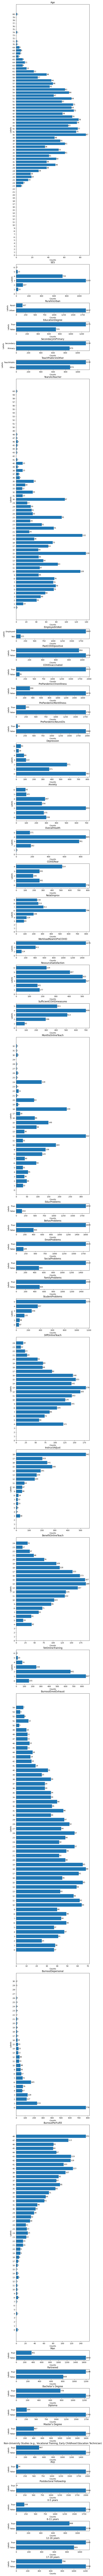

In [7]:
plot_bar_counts(df, cs)

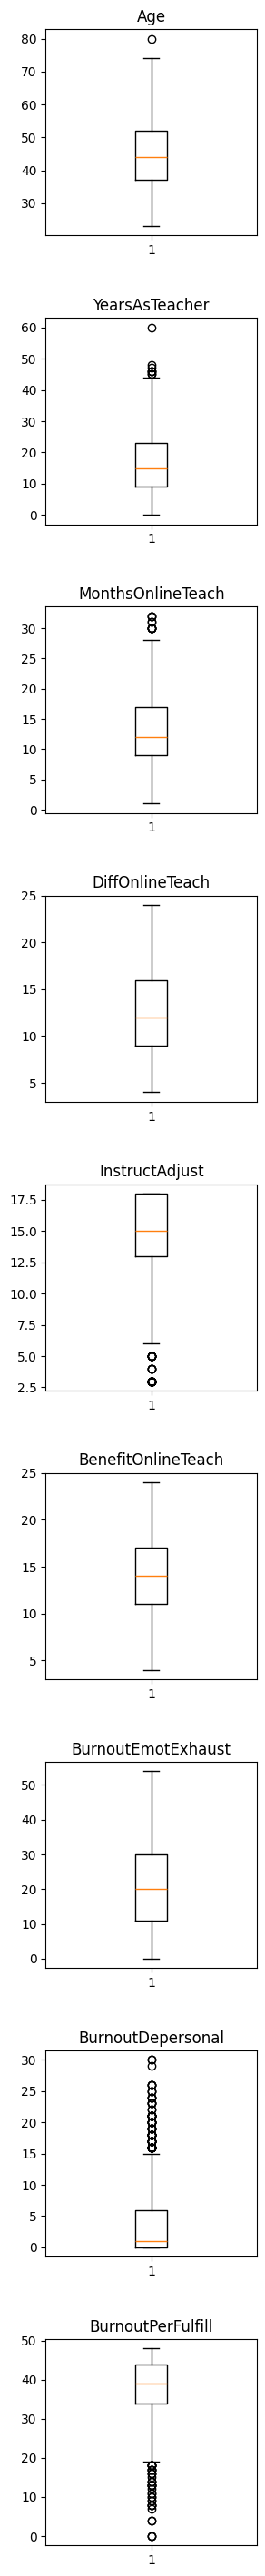

In [8]:
plot_boxs(df, contcs)